In [1]:
import torch

/Users/bahk_insung/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 1
z = 2 * y ** 2
r = z.mean()

In [3]:
print(f"Result : ", r)

Result :  tensor(8., grad_fn=<MeanBackward0>)


In [4]:
r.backward()
print(x.grad)

tensor([[2., 2.],
        [2., 2.]])


# Linear regression

In [5]:
import matplotlib.pyplot as plt
import torch

x = torch.FloatTensor(range(5)).unsqueeze(1)
y = 2 * x + torch.randn(5, 1)
num_featrus = x.shape[1]

In [6]:
w = torch.randn(num_featrus, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

In [7]:
learning_rate = 1e-3
optimizer = torch.optim.SGD([w, b], lr=learning_rate)

In [8]:
loss_stack = list()
for epoch in range(1001):
    optimizer.zero_grad()
    y_hat = torch.matmul(x, w) + b
    loss = torch.mean((y_hat - y) ** 2)
    
    loss.backward()
    optimizer.step()
    loss_stack.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch} : {loss.item()}")

Epoch 0 : 48.935977935791016
Epoch 100 : 4.052964687347412
Epoch 200 : 1.0325334072113037
Epoch 300 : 0.8290454149246216
Epoch 400 : 0.8151357769966125
Epoch 500 : 0.8140071630477905
Epoch 600 : 0.8137603998184204
Epoch 700 : 0.8135923147201538
Epoch 800 : 0.8134459257125854
Epoch 900 : 0.8133169412612915
Epoch 1000 : 0.8132020831108093


In [9]:
with torch.no_grad():
    y_hat = torch.matmul(x, w) + b

print(f"Predict result :\n{y_hat}")

Predict result :
tensor([[-0.9825],
        [ 1.4873],
        [ 3.9571],
        [ 6.4269],
        [ 8.8966]])


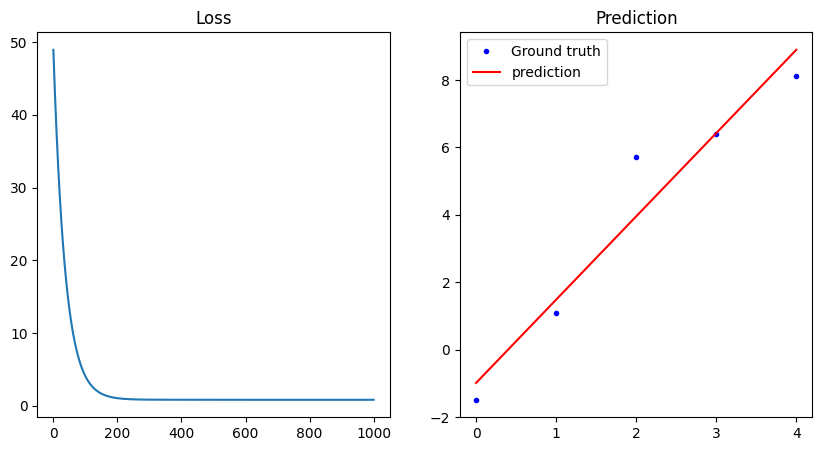

In [10]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")

plt.subplot(122)
plt.plot(x, y, '.b')
plt.plot(x, y_hat, 'r-')

plt.legend(['Ground truth', 'prediction'])
plt.title("Prediction")
plt.show()